In [15]:
%pylab inline
import numpy as np
import pandas as pd
import os
import Hamiltonian
import MoireLattice
from scipy import linalg as la

Populating the interactive namespace from numpy and matplotlib


/Users/jfmv/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathMAC
path=pathy+'/Mods/data20_mode_L_symmetry_a_alpha_0.0_beta_1.0_umklp_0_kappa_0.8174358974358973_theta_0.01832595714594046.h5'
df = pd.read_hdf(path)

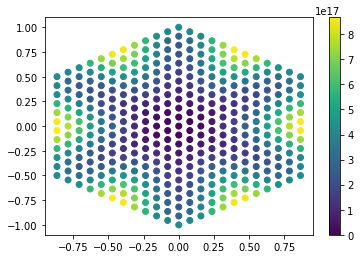

In [17]:
df_prime=df.loc[df['nu']==0]
scatter(df_prime['kx'],df_prime['ky'], c=df_prime['bub'])
colorbar()

Text(0, 0.5, '$\\alpha/ c_L$')

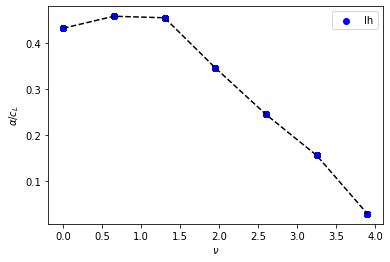

In [18]:

fillings=df['nu']
cep=df['delt_cph']/21400
plt.scatter(fillings, cep, c='b', label='lh')
plt.plot(fillings, cep, c='k', ls='--')
plt.legend()
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\alpha/ c_L$")
# plt.savefig("velocities_V_filling_"+self.name+"_"+str(Nsamp)+"_theta_"+str(theta)+".png")


## For the twist angle

In [27]:
kappa=0.75
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_T_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))


starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.28220510482788086  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.9999999999999964
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2779579162597656  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000039
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2731609344482422  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999787
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2812690734863281  s
number of bands in density of states calculation, 2
sum of the hist, normed? 7.999999999999927
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.26741504669189453  s
number of bands in density of states calculation, 2
sum of the hist, normed? 

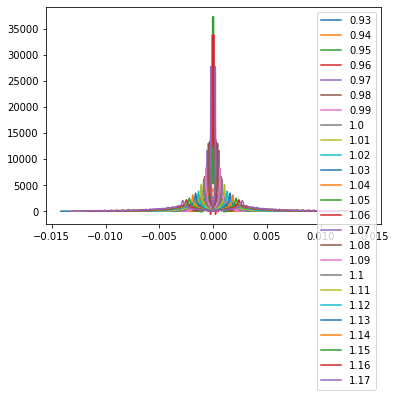

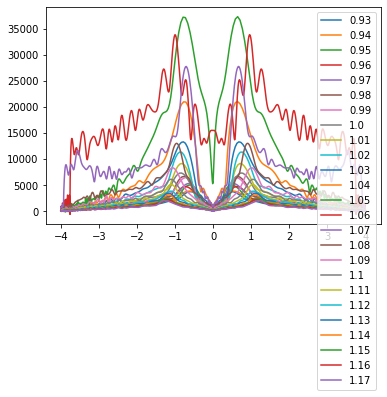

In [28]:
for i,t in enumerate(tdos):
    plot(eners[i],t, label=round(thetass[i]*180/np.pi,2))
legend(loc=1)

plt.show()


for i,t in enumerate(tdos):
    plot(fils[i],t, label=round(thetass[i]*180/np.pi,2))
legend(loc=1)

plt.show()


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.21'),
 Text(0, 2.5, '0.41'),
 Text(0, 3.5, '0.62'),
 Text(0, 4.5, '0.82'),
 Text(0, 5.5, '1.03'),
 Text(0, 6.5, '1.23'),
 Text(0, 7.5, '1.44'),
 Text(0, 8.5, '1.64'),
 Text(0, 9.5, '1.85'),
 Text(0, 10.5, '2.05'),
 Text(0, 11.5, '2.26'),
 Text(0, 12.5, '2.46'),
 Text(0, 13.5, '2.67'),
 Text(0, 14.5, '2.87'),
 Text(0, 15.5, '3.08'),
 Text(0, 16.5, '3.28'),
 Text(0, 17.5, '3.49'),
 Text(0, 18.5, '3.69'),
 Text(0, 19.5, '3.9')]

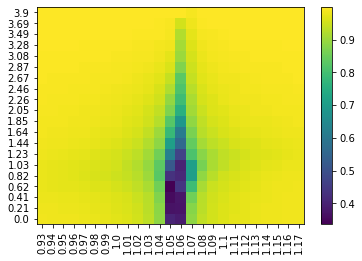

In [29]:

dataframeatgamma=df.loc[(df['kx']==0) & (df['ky']==0)] #since I have all the values of the bubble i need only to take one to check the effective c
tablenuthet=dataframeatgamma.pivot(index='nu', columns='theta', values='delt_cph')
cLong=13600
cep=tablenuthet/cLong
effectivec=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)

fig,ax = plt.subplots()
c=ax.pcolor(effectivec)
fig.colorbar(c, ax=ax)


ax.set_xticks(np.arange(tablenuthet.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tablenuthet.shape[0]) + 0.5, minor=False)

# # Rotate the xlabels. Set both x and y labels to headers[1:]
thets=(dataframeatgamma['theta'].unique()*180/np.pi).round(decimals=2)
nus=(dataframeatgamma['nu'].unique()).round(decimals=2)
ax.set_xticklabels(thets,rotation=90)
ax.set_yticklabels(nus)



In [30]:
kappa=0.3
path=pathy+'/data/thetasweep_kappa_'+str(kappa)+'_T_HR_N30'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=100
    theta=dff['theta'][0]
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Hamiltonian.Ham_BM_p(hvkd, alph, 1, lq, kappa, PH)
    hmin=Hamiltonian.Ham_BM_m(hvkd, alph, -1, lq, kappa, PH)

    Ndos=80
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2)
    disp=Hamiltonian.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))



starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.31702709197998047  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000021
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.315396785736084  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000103
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.30189990997314453  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000032
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.29643917083740234  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000064
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.2999851703643799  s
number of bands in density of states calculation, 2
sum of the hist, normed? 8

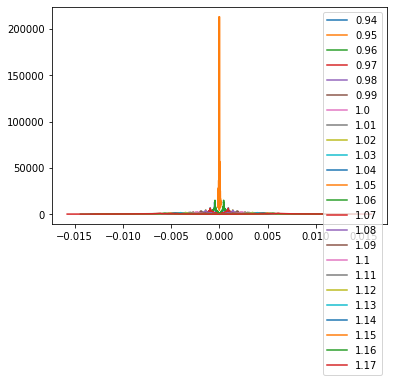

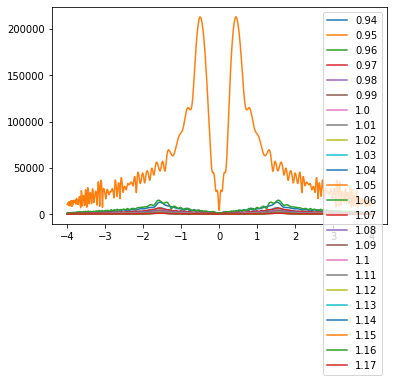

In [31]:
for i,t in enumerate(tdos):
    plot(eners[i],t, label=round(thetass[i]*180/np.pi,2))
legend(loc=1)

plt.show()


for i,t in enumerate(tdos):
    plot(fils[i],t, label=round(thetass[i]*180/np.pi,2))
legend(loc=1)

plt.show()


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.21'),
 Text(0, 2.5, '0.41'),
 Text(0, 3.5, '0.62'),
 Text(0, 4.5, '0.82'),
 Text(0, 5.5, '1.03'),
 Text(0, 6.5, '1.23'),
 Text(0, 7.5, '1.44'),
 Text(0, 8.5, '1.64'),
 Text(0, 9.5, '1.85'),
 Text(0, 10.5, '2.05'),
 Text(0, 11.5, '2.26'),
 Text(0, 12.5, '2.46'),
 Text(0, 13.5, '2.67'),
 Text(0, 14.5, '2.87'),
 Text(0, 15.5, '3.08'),
 Text(0, 16.5, '3.28'),
 Text(0, 17.5, '3.49'),
 Text(0, 18.5, '3.69'),
 Text(0, 19.5, '3.9')]

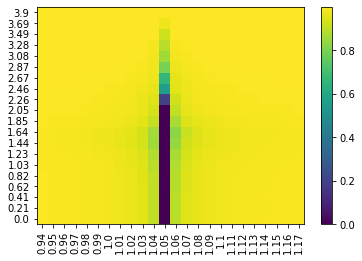

In [33]:

dataframeatgamma=df.loc[(df['kx']==0) & (df['ky']==0)] #since I have all the values of the bubble i need only to take one to check the effective c
tablenuthet=dataframeatgamma.pivot(index='nu', columns='theta', values='delt_cph')
cLong=13600
cep=tablenuthet/cLong
effectivec=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)

fig,ax = plt.subplots()
c=ax.pcolor(effectivec)
fig.colorbar(c, ax=ax)


ax.set_xticks(np.arange(tablenuthet.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tablenuthet.shape[0]) + 0.5, minor=False)

# # Rotate the xlabels. Set both x and y labels to headers[1:]
thets=(dataframeatgamma['theta'].unique()*180/np.pi).round(decimals=2)
nus=(dataframeatgamma['nu'].unique()).round(decimals=2)
ax.set_xticklabels(thets,rotation=90)
ax.set_yticklabels(nus)

In [185]:

path=pathMAC+'/data/thetasweep_kappa_0.5_N30/'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
for i, pat in enumerate(subpaths):
    print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
df=pd.concat(frames).sort_values(['theta', 'nu'])




thetasweep_kappa_0.5_N30_0.98_2022-01-26-09-57-17
thetasweep_kappa_0.5_N30_0.9_2022-01-26-07-34-22
thetasweep_kappa_0.5_N30_1.0_2022-01-26-08-52-45
thetasweep_kappa_0.5_N30_0.86_2022-01-26-07-18-24
thetasweep_kappa_0.5_N30_1.12_2022-01-26-07-11-47
thetasweep_kappa_0.5_N30_0.96_2022-01-26-10-01-40
thetasweep_kappa_0.5_N30_1.04_2022-01-26-07-20-54
thetasweep_kappa_0.5_N30_1.02_2022-01-26-07-54-54
thetasweep_kappa_0.5_N30_0.88_2022-01-26-06-13-37
thetasweep_kappa_0.5_N30_1.08_2022-01-26-07-30-15
thetasweep_kappa_0.5_N30_1.14_2022-01-26-07-29-04
thetasweep_kappa_0.5_N30_1.1_2022-01-26-07-40-16
thetasweep_kappa_0.5_N30_0.92_2022-01-26-06-21-35
thetasweep_kappa_0.5_N30_0.94_2022-01-26-06-24-40
thetasweep_kappa_0.5_N30_1.06_2022-01-26-06-46-13
thetasweep_kappa_0.5_N30_0.84_2022-01-26-07-37-18


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.65'),
 Text(0, 2.5, '1.3'),
 Text(0, 3.5, '1.95'),
 Text(0, 4.5, '2.6'),
 Text(0, 5.5, '3.25'),
 Text(0, 6.5, '3.9')]

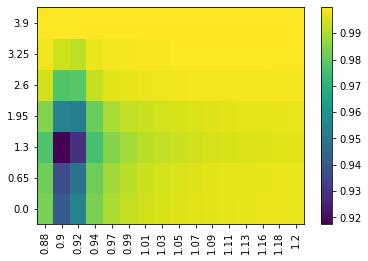

In [186]:

dataframeatgamma=df.loc[(df['kx']==0) & (df['ky']==0)] #since I have all the values of the bubble i need only to take one to check the effective c
tablenuthet=dataframeatgamma.pivot(index='nu', columns='theta', values='delt_cph')
cLong=21400
cep=tablenuthet/cLong
effectivec=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)

fig,ax = plt.subplots()
c=ax.pcolor(effectivec)
fig.colorbar(c, ax=ax)


ax.set_xticks(np.arange(tablenuthet.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tablenuthet.shape[0]) + 0.5, minor=False)

# # Rotate the xlabels. Set both x and y labels to headers[1:]
thets=(dataframeatgamma['theta'].unique()*180/np.pi).round(decimals=2)
nus=(dataframeatgamma['nu'].unique()).round(decimals=2)
ax.set_xticklabels(thets,rotation=90)
ax.set_yticklabels(nus)

In [125]:

path=pathMAC+'/data/thetasweep_kappa_0.3_N30/'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
for i, pat in enumerate(subpaths):
    print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
df=pd.concat(frames).sort_values(['theta', 'nu'])




thetasweep_kappa_0.3_N30_0.9_2022-01-26-09-08-18
thetasweep_kappa_0.3_N30_1.12_2022-01-26-06-31-49
thetasweep_kappa_0.3_N30_0.98_2022-01-26-07-24-32
thetasweep_kappa_0.3_N30_0.84_2022-01-26-06-17-12
thetasweep_kappa_0.3_N30_1.08_2022-01-26-06-46-28
thetasweep_kappa_0.3_N30_0.92_2022-01-26-06-57-01
thetasweep_kappa_0.3_N30_1.04_2022-01-26-06-14-24
thetasweep_kappa_0.3_N30_1.1_2022-01-26-07-26-43
thetasweep_kappa_0.3_N30_0.88_2022-01-26-06-40-09
thetasweep_kappa_0.3_N30_1.02_2022-01-26-06-57-25
thetasweep_kappa_0.3_N30_1.06_2022-01-26-07-06-30
thetasweep_kappa_0.3_N30_0.86_2022-01-26-06-14-49
thetasweep_kappa_0.3_N30_0.94_2022-01-26-06-15-41
thetasweep_kappa_0.3_N30_1.0_2022-01-26-06-16-37
thetasweep_kappa_0.3_N30_0.96_2022-01-26-07-09-02
thetasweep_kappa_0.3_N30_1.14_2022-01-26-06-16-49


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.65'),
 Text(0, 2.5, '1.3'),
 Text(0, 3.5, '1.95'),
 Text(0, 4.5, '2.6'),
 Text(0, 5.5, '3.25'),
 Text(0, 6.5, '3.9')]

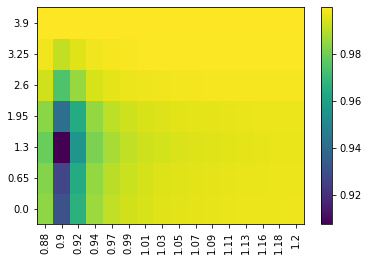

In [126]:

dataframeatgamma=df.loc[(df['kx']==0) & (df['ky']==0)] #since I have all the values of the bubble i need only to take one to check the effective c
tablenuthet=dataframeatgamma.pivot(index='nu', columns='theta', values='delt_cph')
cLong=21400
cep=tablenuthet/cLong
effectivec=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)

fig,ax = plt.subplots()
c=ax.pcolor(effectivec)
fig.colorbar(c, ax=ax)

ax.set_xticks(np.arange(tablenuthet.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tablenuthet.shape[0]) + 0.5, minor=False)

# # Rotate the xlabels. Set both x and y labels to headers[1:]
thets=(dataframeatgamma['theta'].unique()*180/np.pi).round(decimals=2)
nus=(dataframeatgamma['nu'].unique()).round(decimals=2)
ax.set_xticklabels(thets,rotation=90)
ax.set_yticklabels(nus)

In [127]:

path=pathMAC+'/data/thetasweep_kappa_0.85_N30/'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
for i, pat in enumerate(subpaths):
    print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
df=pd.concat(frames).sort_values(['theta', 'nu'])


thetasweep_kappa_0.85_N30_0.9_2022-01-26-14-23-18
thetasweep_kappa_0.85_N30_1.0_2022-01-26-14-25-21
thetasweep_kappa_0.85_N30_1.14_2022-01-26-14-35-07
thetasweep_kappa_0.85_N30_1.02_2022-01-26-14-24-23
thetasweep_kappa_0.85_N30_1.08_2022-01-26-14-44-38
thetasweep_kappa_0.85_N30_1.1_2022-01-26-14-33-15
thetasweep_kappa_0.85_N30_0.86_2022-01-26-14-07-36
thetasweep_kappa_0.85_N30_0.88_2022-01-26-14-08-09
thetasweep_kappa_0.85_N30_0.92_2022-01-26-14-25-04
thetasweep_kappa_0.85_N30_0.84_2022-01-26-14-06-10
thetasweep_kappa_0.85_N30_0.94_2022-01-26-14-23-02
thetasweep_kappa_0.85_N30_0.98_2022-01-26-14-26-18
thetasweep_kappa_0.85_N30_1.06_2022-01-26-14-32-08
thetasweep_kappa_0.85_N30_1.04_2022-01-26-14-40-32
thetasweep_kappa_0.85_N30_0.96_2022-01-26-14-25-55
thetasweep_kappa_0.85_N30_1.12_2022-01-26-14-37-38


[Text(0, 0.5, '0.0'),
 Text(0, 1.5, '0.65'),
 Text(0, 2.5, '1.3'),
 Text(0, 3.5, '1.95'),
 Text(0, 4.5, '2.6'),
 Text(0, 5.5, '3.25'),
 Text(0, 6.5, '3.9')]

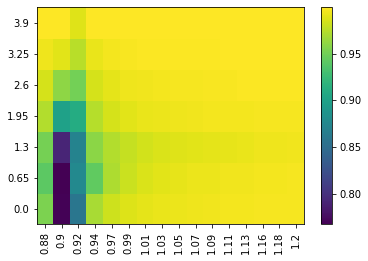

In [128]:
dataframeatgamma=df.loc[(df['kx']==0) & (df['ky']==0)] #since I have all the values of the bubble i need only to take one to check the effective c
tablenuthet=dataframeatgamma.pivot(index='nu', columns='theta', values='delt_cph')
cLong=21400
cep=tablenuthet/cLong
effectivec=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)

fig,ax = plt.subplots()
c=ax.pcolor(effectivec)
fig.colorbar(c, ax=ax)

ax.set_xticks(np.arange(tablenuthet.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(tablenuthet.shape[0]) + 0.5, minor=False)

# # Rotate the xlabels. Set both x and y labels to headers[1:]
thets=(dataframeatgamma['theta'].unique()*180/np.pi).round(decimals=2)
nus=(dataframeatgamma['nu'].unique()).round(decimals=2)
ax.set_xticklabels(thets,rotation=90)
ax.set_yticklabels(nus)

range of twist angles 0.010499999999999954


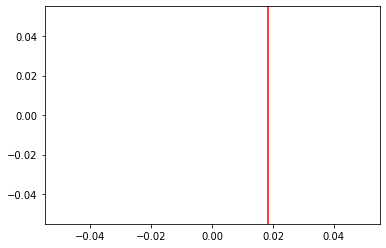

In [129]:
scatter(thet, renorm2)
axvline(1.05*np.pi/180, c='r')
# axvline((1.015)*1.05*np.pi/180, c='k')
# axvline((1.025)*1.05*np.pi/180, c='k')
# axvline((1.02)*1.05*np.pi/180, c='k')
print("range of twist angles", (1.025)*1.05-(1.015)*1.05)
NS=20
# for i in range(NS):
#     l=(i-int(NS/2))*0.005
#     axvline((1+l)*1.05*np.pi/180)
#     print((1+l))

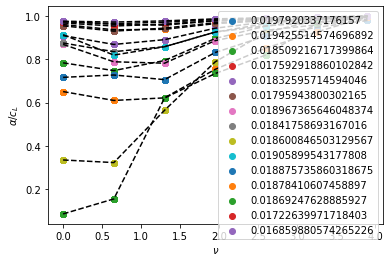

In [130]:
path=pathMAC+'/data/thetasweep_kappa_0.817_beta_4ev_N30/'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        

for i, pat in enumerate(subpaths):
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'L')
    fullpath=fulpath+'/'+data[0]
    
    df = pd.read_hdf(fullpath)
    
    fillings=df['nu']
    cep=df['delt_cph']/21400
    cep2=np.sqrt(np.abs(1-cep**2))*np.heaviside(1-cep**2,0.0)
    plt.scatter(fillings, cep2, label=str(df['theta'][0]))
    plt.plot(fillings, cep2, c='k', ls='--')
    plt.legend()
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha/ c_L$")
    # plt.savefig("velocities_V_filling_"+self.name+"_"+str(Nsamp)+"_theta_"+str(theta)+".png")


# For kappa

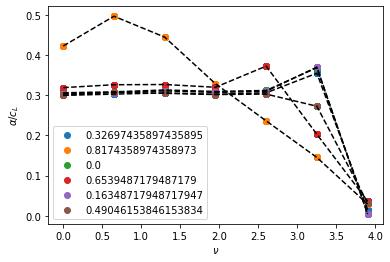

In [10]:
path='/home/jfm343/Documents/Moire_phonon/BM_bandstructure/data/kappasweep_theta_1.05_beta_4ev_N30_2022-01-20-09-58-20'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        

for i, pat in enumerate(subpaths):
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'T')
    fullpath=fulpath+'/'+data[0]
    
    df = pd.read_hdf(fullpath)
    
    fillings=df['nu']
    cep=df['delt_cph']/21400
    cep2=np.sqrt(1-cep**2)
    plt.scatter(fillings, cep, label=str(df['kappa'][0]))
    plt.plot(fillings, cep, c='k', ls='--')
    plt.legend()
    plt.xlabel(r"$\nu$")
    plt.ylabel(r"$\alpha/ c_L$")
    # plt.savefig("velocities_V_filling_"+self.name+"_"+str(Nsamp)+"_theta_"+str(theta)+".png")


In [19]:
import Hamiltonian
import MoireLattice
from scipy import linalg as la

#Lattice parameters 
#lattices with different normalizations
modulation_thet=1
Nsamp=10
theta=modulation_thet*1.05*np.pi/180  # magic angle 
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0) 
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2) #this one 
[KX,KY]=lq.Generate_lattice()
Npoi=np.size(KX); print(Npoi, "numer of sampling lattice points")
[q1,q2,q3]=l.q
q=la.norm(q1)
umkl=0
print(f"taking {umkl} umklapps")
VV=lq.boundary()

print(q, 2*np.sin(theta/2)*np.pi*(4/3))

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.005800485610961914  s
91 numer of sampling lattice points
taking 0 umklapps
0.07676251561000431 0.0767625156100043


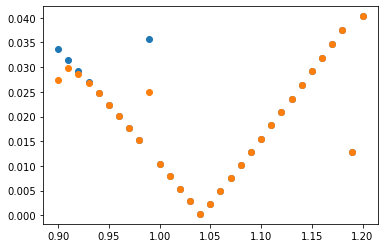

In [21]:
theta=np.linspace(0.9,1.2,31)
bw03=loadtxt(pathy+'/data/bws_test/bw03.dat')
bw075=loadtxt(pathy+'/data/bws_test/bw075.dat')
scatter(theta, bw03)
scatter(theta, bw075)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.0200248362136612

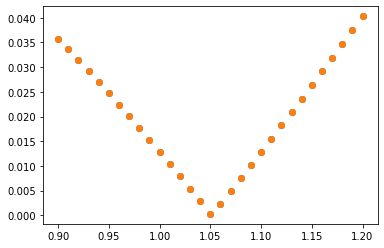

In [4]:
f = open(pathy+'/data/bws_test/bw03.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws)
f = open(pathy+'/data/bws_test/bw075.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

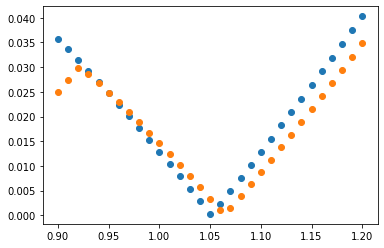

In [4]:
f = open(pathy+'/data/bws_test/bw03.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws)
f = open(pathy+'/data/bws_test/bw075.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws)

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

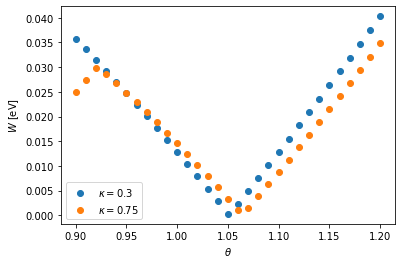

In [5]:
f = open(pathy+'/data/bws_test/bw03_2.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws,label=r'$\kappa=0.3$')
f = open(pathy+'/data/bws_test/bw075_2.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

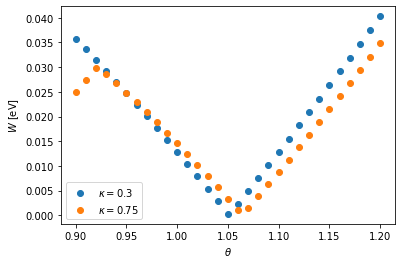

In [6]:
f = open(pathy+'/data/bws_test/bw03_kp.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
    
scatter(thetaas,bws,label=r'$\kappa=0.3$')
f = open(pathy+'/data/bws_test/bw075_kp.dat', "r")
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))
scatter(thetaas,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()

0.91 0.033643931262116095

0.92 0.03145758337276082

0.93 0.029236171154953108

0.94 0.026980980000201455

0.95 0.02469324462263112

0.96 0.02237415064418439

0.97 0.020024836213661294

0.98 0.017646393643587048

0.99 0.015239871051386557

0.9 0.0357938772215257

1.01 0.010346567083396738

1.02 0.007861675584589542

1.03 0.005352486974308776

1.04 0.00281985247086812

1.05 0.0002645885219768042

1.06 0.0023125217494067243

1.07 0.004910727143794225

1.08 0.007529307029984963

1.09 0.010167570036903297

1.0 0.01280627399355594

1.11 0.015500518712672166

1.12 0.01819395683114167

1.13 0.02090458068435653

1.14 0.02363182723598342

1.15 0.02637515584880859

1.16 0.02913404730000814

1.17 0.03190800283898172

1.18 0.03469654328645112

1.19 0.0374992081734728

1.1 0.012824852792918218

1.2 0.04031555491896721

0.91 0.02742032974804828

0.92 0.029928191820134963

0.93 0.028589100562741047

0.94 0.026733068266046173

0.95 0.024825809831399082

0.96 0.022869334550215812

0.97 0.02086557968416

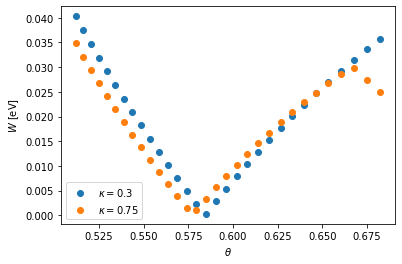

In [14]:
#JY params 

hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
up = 0.105; # eV
Kd=4*np.pi/3

f = open(pathy+'/data/bws_test/bw03_kp.dat', "r")
kappa=0.3
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))

tht=np.array(thetaas)*np.pi/180
q=2*np.sin(tht/2)*Kd
hvkd=hbvf*q
alpha=up/hvkd
alph=alpha   
scatter(alph,bws,label=r'$\kappa=0.3$')


f = open(pathy+'/data/bws_test/bw075_2band_kp.dat', "r")
kappa=0.75
thetaas=[]
bws=[]
for a in f.readlines():
    b=a.split('\t') 
    print(b[0].split("_")[-1][:-15], b[1])
    thetaas.append(float(b[0].split("_")[-1][:-15]))
    bws.append(float(b[1]))


tht=np.array(thetaas)*np.pi/180
q=2*np.sin(tht/2)*Kd
hvkd=hbvf*q
alpha=up/hvkd
alph=alpha   

scatter(alph,bws, label=r'$\kappa=0.75$')
xlabel(r'$\theta$')
ylabel(r'$W$ [eV]')
legend()